Image loaded successfully.
Unique values and their counts:
Value: 0, Count: 292957
Value: 1, Count: 13715
Value: 2, Count: 4692


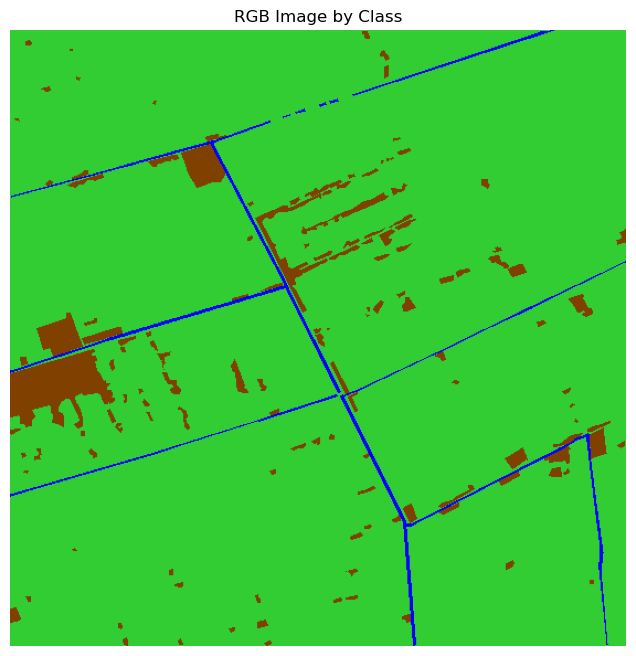

Transformed RGB image saved at: F:\survay course\Master\Data_Set\Maskes\segmented_images\Tile1_rgb_image_transformed.png


In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# تحميل الصورة
image_path = "F:\\survay course\\Master\\Data_Set\\Maskes\\segmented_images\\Tile1_rgb_image__semantic_mask.png"  # ضع مسار الصورة هنا
try:
    mask_image = Image.open(image_path)
    print("Image loaded successfully.")
except FileNotFoundError:
    print("Error: The specified image file was not found.")
    exit()

# تحويل الصورة إلى مصفوفة numpy
mask_array = np.array(mask_image)

# استخراج القيم الفريدة وأعدادها
unique_values, counts = np.unique(mask_array, return_counts=True)
print("Unique values and their counts:")
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

# تعريف خريطة التحويل (lookup) - يجب ضبط الألوان حسب القيم الفريدة
lookup = {
    0: [50, 205, 50],      # Grass الأراضي المزروعة 
    1: [128, 64, 0],       # المباني    Buliding
    2: [0, 0, 255],         # المياه     Water 
    3: [0, 100, 0],      # اشجار 
    4: [254, 221, 58],     # الصحراء  Desret
    5: [128, 128, 128],    # الطرق
    6: [132, 41, 246] ,    # الأراضي الغير مستخدمة 
    7: [155, 155, 155 ],    #غير مصنف  Unlabeled 
}
# تحويل الصورة إلى RGB
rgb_image = np.zeros((mask_array.shape[0], mask_array.shape[1], 3), dtype=np.uint8)

for value, color in lookup.items():
    rgb_image[mask_array == value] = color

# عرض الصورة الناتجة
plt.figure(figsize=(8, 8))
plt.title("RGB Image by Class")
plt.imshow(rgb_image)
plt.axis("off")
plt.show()

# حفظ الصورة إذا أردت
output_path = "F:\\survay course\\Master\\Data_Set\\Maskes\\segmented_images\\Tile1_rgb_image_transformed.png"
Image.fromarray(rgb_image).save(output_path)
print(f"Transformed RGB image saved at: {output_path}")

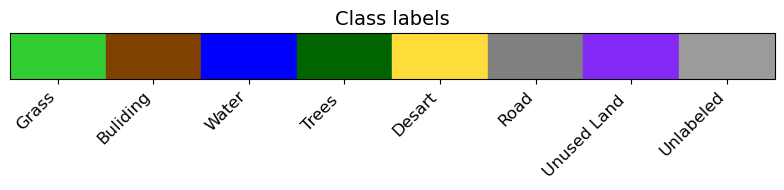

In [11]:
import matplotlib.pyplot as plt

# Define the classes and their corresponding colors
classes = ["Grass","Buliding","Water","Trees ","Desart", "Road","Unused Land ","Unlabeled"]
colors = [ 
    [50, 205, 50],      # Grass الأراضي المزروعة 
    [128, 64, 0],       # المباني
    [0, 0, 255],        # المياه
    [0, 100, 0],        # اشجار 
    [254, 221, 58],     # الصحراء
    [128, 128, 128],    # الطرق
    [132, 41, 246] ,    # الأراضي الغير مستخدمة 
    [155, 155, 155 ]   #غير مصنف 
]

# Normalize the RGB values to [0, 1] for matplotlib
normalized_colors = [[c / 255 for c in color] for color in colors]

# Create a figure
fig, ax = plt.subplots(figsize=(8, 2))

# Plot each color
for i, color in enumerate(normalized_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set axis labels and remove ticks
ax.set_xticks([i + 0.5 for i in range(len(classes))])
ax.set_xticklabels(classes, rotation=45, ha="right", fontsize=12)
ax.set_yticks([])
ax.set_xlim(0, len(classes))
ax.set_ylim(0, 1)
ax.set_title("Class labels", fontsize=14)
plt.tight_layout()
plt.show()
